## 블러링, 샤프닝, 에지 검출 
### ▶ 문서 스캐너 개선기 - 스캔된 문서의 가독성 향상

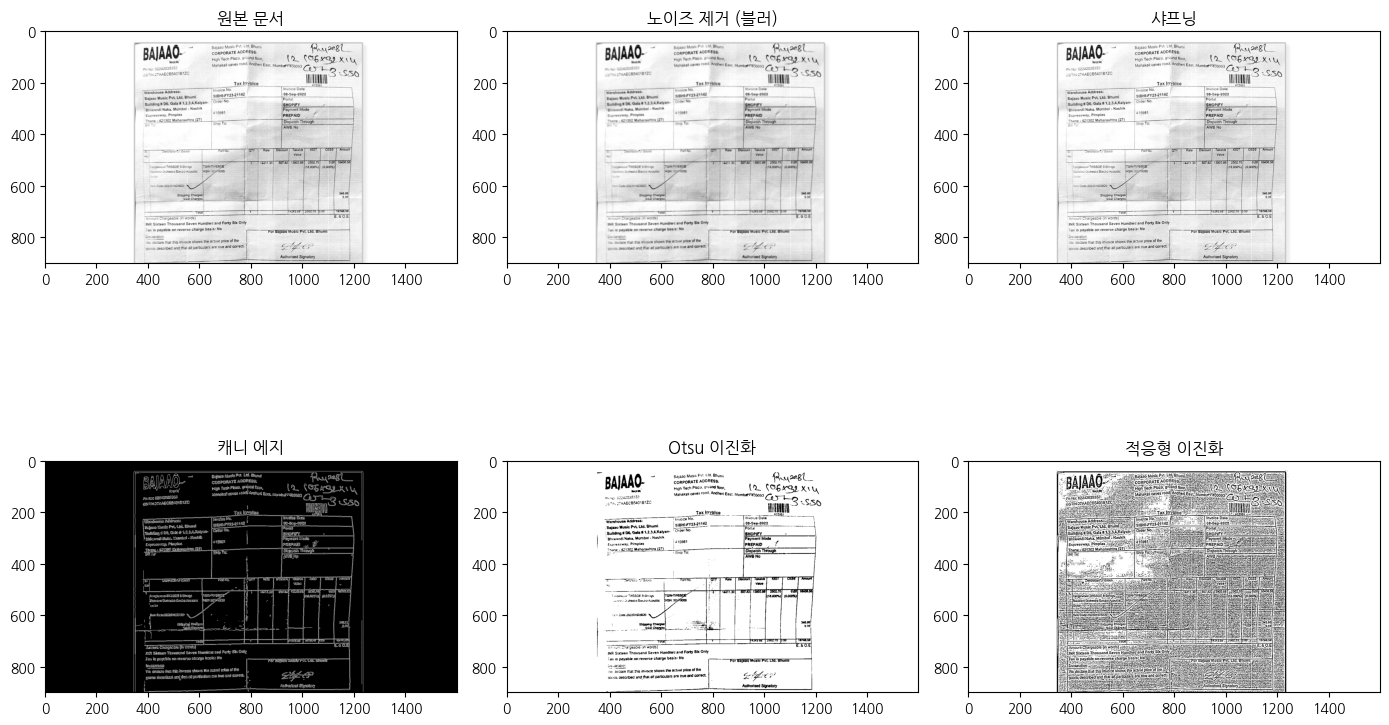

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 스캔된 문서 이미지 읽기
doc = cv2.imread('../cv_images/scanned_doc.jpg')
gray_doc = cv2.cvtColor(doc, cv2.COLOR_BGR2GRAY)

# 1. 노이즈 제거 (블러링)
blurred = cv2.GaussianBlur(gray_doc, (5, 5), 0)

# 2. 샤프닝 (언샤프 마스킹)
sharpened = cv2.addWeighted(gray_doc, 1.5, blurred, -0.5, 0)

# 3. 에지 검출
edges_canny = cv2.Canny(gray_doc, 100, 200)
edges_sobel_x = cv2.Sobel(gray_doc, cv2.CV_64F, 1, 0, ksize=3)
edges_sobel_y = cv2.Sobel(gray_doc, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = cv2.magnitude(edges_sobel_x, edges_sobel_y)
edges_sobel = cv2.normalize(edges_sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 4. 텍스트 가독성 향상 (이진화)
_, binary = cv2.threshold(gray_doc, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
adaptive_binary = cv2.adaptiveThreshold(gray_doc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

# 결과 시각화
plt.figure(figsize=(14, 10))
plt.subplot(231), plt.imshow(gray_doc, cmap='gray'), plt.title('원본 문서')
plt.subplot(232), plt.imshow(blurred, cmap='gray'), plt.title('노이즈 제거 (블러)')
plt.subplot(233), plt.imshow(sharpened, cmap='gray'), plt.title('샤프닝')
plt.subplot(234), plt.imshow(edges_canny, cmap='gray'), plt.title('캐니 에지')
plt.subplot(235), plt.imshow(binary, cmap='gray'), plt.title('Otsu 이진화')
plt.subplot(236), plt.imshow(adaptive_binary, cmap='gray'), plt.title('적응형 이진화')
plt.tight_layout()
plt.show()